<a href="https://colab.research.google.com/github/LucaswasTaken/NES-DataScience/blob/main/Aula%204/Python_para_an%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório sobre visualização de dados

Fonte: https://www.youtube.com/watch?v=6ciZ6q4rGP0

**1.2. Importar Bibliotecas**

Importe as bibliotecas que você usará neste laboratório:

In [1]:
import pandas as pd # ler e manipular dados tabulares
import numpy as np # trabalhar com matrizes
import matplotlib.pyplot as plt # gera gráficos
import seaborn as sns # gera gráficos mais legais

**2. Importar Dados**

2.1. Carregar Dados de um Arquivo CSV

In [3]:
dados = pd.read_csv('./dados_filtrados_por_satelite.csv')
dados.head()

,Unnamed: 0,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,34,2022-04-14 02:51:00,TERRA_M-M,Brasil,RONDÔNIA,ESPIGÃO D'OESTE,Amazônia,0.0,7.9,0.0,-11.06309,-60.89314,19.8
1,35,2022-04-14 02:51:00,TERRA_M-M,Brasil,RONDÔNIA,ESPIGÃO D'OESTE,Amazônia,0.0,7.8,0.0,-11.06054,-60.87742,18.5
2,36,2022-04-14 02:51:00,TERRA_M-M,Brasil,RONDÔNIA,RIO CRESPO,Amazônia,0.0,6.5,0.0,-9.58441,-62.45668,6.4
3,39,2022-04-16 02:38:00,TERRA_M-M,Brasil,RONDÔNIA,ESPIGÃO D'OESTE,Amazônia,1.0,6.1,0.0,-11.10652,-60.85144,3.6
4,632,2022-05-09 02:40:00,TERRA_M-M,Brasil,RONDÔNIA,SÃO FRANCISCO DO GUAPORÉ,Amazônia,5.0,0.4,1.0,-12.19800,-63.66600,4.4


Selecionar apenas colunas de interesse

In [4]:
dados_filtrados = dados[['DataHora', 'Estado', 'Municipio']]
dados_filtrados

,DataHora,Estado,Municipio
0,2022-04-14 02:51:00,RONDÔNIA,ESPIGÃO D'OESTE
1,2022-04-14 02:51:00,RONDÔNIA,ESPIGÃO D'OESTE
2,2022-04-14 02:51:00,RONDÔNIA,RIO CRESPO
3,2022-04-16 02:38:00,RONDÔNIA,ESPIGÃO D'OESTE
4,2022-05-09 02:40:00,RONDÔNIA,SÃO FRANCISCO DO GUAPORÉ
...,...,...,...
8967,2023-07-27 05:44:00,RONDÔNIA,OURO PRETO DO OESTE
8968,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE
8969,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE
8970,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE


Criar uma coluna com valores constantes para podermos contar a ocorrência

In [5]:
dados_filtrados['Queimada'] = 1
dados_filtrados

<ipython-input-5-2bd0eaedcd52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['Queimada'] = 1


,DataHora,Estado,Municipio,Queimada
0,2022-04-14 02:51:00,RONDÔNIA,ESPIGÃO D'OESTE,1
1,2022-04-14 02:51:00,RONDÔNIA,ESPIGÃO D'OESTE,1
2,2022-04-14 02:51:00,RONDÔNIA,RIO CRESPO,1
3,2022-04-16 02:38:00,RONDÔNIA,ESPIGÃO D'OESTE,1
4,2022-05-09 02:40:00,RONDÔNIA,SÃO FRANCISCO DO GUAPORÉ,1
...,...,...,...,...
8967,2023-07-27 05:44:00,RONDÔNIA,OURO PRETO DO OESTE,1
8968,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE,1
8969,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE,1
8970,2023-07-27 05:44:00,RONDÔNIA,ITAPUÃ DO OESTE,1


Converter coluna DataHora para fomato de data

In [8]:
dados_filtrados['DataHora'] = pd.to_datetime(dados_filtrados['DataHora'])
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8972 entries, 0 to 8971
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DataHora   8972 non-null   datetime64[ns]
 1   Estado     8972 non-null   object        
 2   Municipio  8972 non-null   object        
 3   Queimada   8972 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 280.5+ KB


<ipython-input-8-7b47e3139a32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['DataHora'] = pd.to_datetime(dados_filtrados['DataHora'])


Agrupar os valores para cada mês

In [9]:
# Agrupa 'dados_filtrados' por mês na coluna 'DataHora', 'Estado' e 'Municipio',
# somando os valores da coluna 'Queimada' para cada grupo e redefinindo o índice.
dados_filtrados_mensais = dados_filtrados.groupby([pd.Grouper(key='DataHora', freq='M'), 'Estado', 'Municipio']).agg({'Queimada': 'sum'}).reset_index()
dados_filtrados_mensais

<ipython-input-9-80bb70ebd14c>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dados_filtrados_mensais = dados_filtrados.groupby([pd.Grouper(key='DataHora', freq='M'), 'Estado', 'Municipio']).agg({'Queimada': 'sum'}).reset_index()


,DataHora,Estado,Municipio,Queimada
0,2022-01-31,RONDÔNIA,COSTA MARQUES,14
1,2022-01-31,RONDÔNIA,ESPIGÃO D'OESTE,1
2,2022-01-31,RONDÔNIA,PIMENTA BUENO,1
3,2022-01-31,RONDÔNIA,PIMENTEIRAS DO OESTE,2
4,2022-01-31,RONDÔNIA,PORTO VELHO,1
...,...,...,...,...
402,2023-12-31,RONDÔNIA,PORTO VELHO,5
403,2023-12-31,RONDÔNIA,SERINGUEIRAS,1
404,2023-12-31,RONDÔNIA,SÃO FRANCISCO DO GUAPORÉ,2
405,2023-12-31,RONDÔNIA,SÃO MIGUEL DO GUAPORÉ,2


Criar gráficos com o nosso dataframe

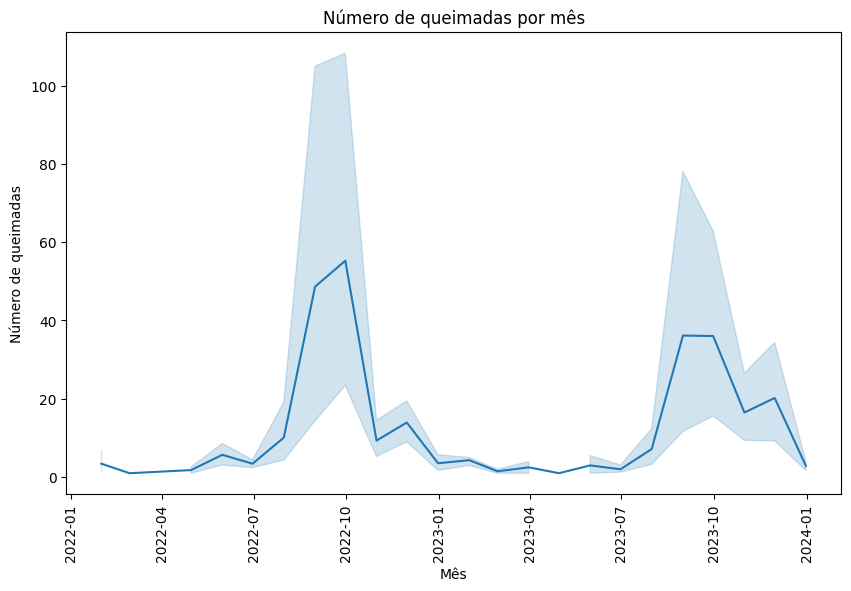

In [26]:
# Importa as bibliotecas necessárias para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Configura o tamanho da figura para 10x6 polegadas
plt.figure(figsize=(10, 6))

# Cria um gráfico de linha usando Seaborn com 'DataHora' no eixo x e 'Queimada' no eixo y
sns.lineplot(data=dados_filtrados_mensais, x='DataHora', y='Queimada')

# Rotaciona os rótulos do eixo x em 90 graus para melhor legibilidade
plt.xticks(rotation=90)

# Adiciona um título e rótulos aos eixos do gráfico
plt.title('Número de queimadas por mês')
plt.xlabel('Mês')
plt.ylabel('Número de queimadas')

# Exibe o gráfico
plt.show()


Essa sombra ao redor da linha no gráfico do Seaborn representa a faixa de confiança (ou intervalo de confiança) para os valores da variável Queimada.

Por padrão, o sns.lineplot() adiciona essa área sombreada para indicar a incerteza em torno da média da variável y (Queimada). O intervalo de confiança é geralmente calculado como 95% de confiança (ou seja, existe 95% de chance de que a média real esteja dentro dessa região). Ele é derivado dos dados e calculado automaticamente pelo Seaborn.

Versão Plotly

In [23]:
import plotly.graph_objects as go
import pandas as pd

# Agrupa os dados por mês e calcula a média e o intervalo de confiança
agrupado = dados_filtrados_mensais.groupby('DataHora')['Queimada'].agg(['mean', 'std']).reset_index()

# Calcula o intervalo de confiança de aproximadamente 95% (1.96 * desvio padrão)
agrupado['upper'] = agrupado['mean'] + 1.96 * agrupado['std']
agrupado['lower'] = agrupado['mean'] - 1.96 * agrupado['std']

# Cria a figura do Plotly
fig = go.Figure()

# Adiciona a linha da média
fig.add_trace(go.Scatter(
    x=agrupado['DataHora'],
    y=agrupado['mean'],
    mode='lines',
    name='Média de queimadas',
    line=dict(color='blue')
))

# Adiciona a área sombreada do intervalo de confiança
fig.add_trace(go.Scatter(
    x=agrupado['DataHora'].tolist() + agrupado['DataHora'].tolist()[::-1],
    y=agrupado['upper'].tolist() + agrupado['lower'].tolist()[::-1],
    fill='toself',
    fillcolor='rgba(0, 0, 255, 0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Intervalo de Confiança (95%)'
))

# Configurações do layout
fig.update_layout(
    title='Número de queimadas por mês',
    xaxis_title='Mês',
    yaxis_title='Número de queimadas',
    xaxis_tickangle=90
)

# Exibe o gráfico
fig.show()


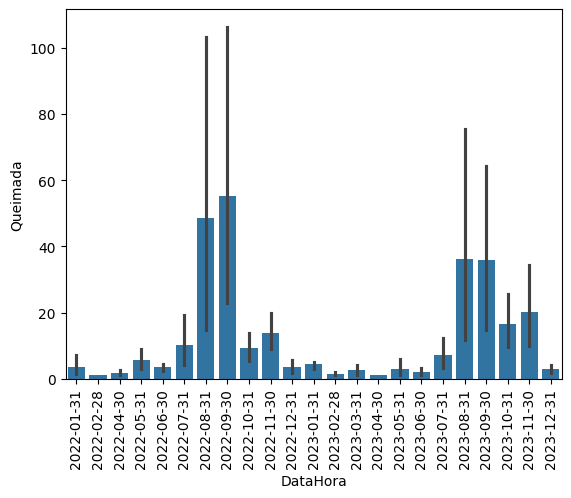

In [13]:
# Importa as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um gráfico de barras utilizando 'DataHora' no eixo x e 'Queimada' no eixo y
sns.barplot(data=dados_filtrados_mensais, x='DataHora', y='Queimada')

# Rotaciona os rótulos do eixo x em 90 graus para melhor legibilidadeQ
plt.xticks(rotation=90)

# Exibe o gráfico
plt.show()


Versão Plotly

In [27]:
import plotly.express as px
import pandas as pd

# Agrupa os dados por mês e calcula a média e o desvio padrão
agrupado = dados_filtrados_mensais.groupby('DataHora')['Queimada'].agg(['mean', 'std']).reset_index()

# Cria o gráfico de barras com Plotly
fig = px.bar(
    agrupado,
    x='DataHora',
    y='mean',
    error_y='std',
    labels={'mean': 'Número médio de queimadas', 'DataHora': 'Mês'},
    title='Número de queimadas por mês'
)

# Rotaciona os rótulos do eixo x para 90 graus
fig.update_layout(xaxis_tickangle=90)

# Exibe o gráfico
fig.show()


# Exercícios

1. Leia o arquivo csv;
2. Selecione apenas o satélite AQUA;
3. Faça o pré-processamento (criar coluna Queimada e converter a coluna DateHora para formato de data e agrupar os dados para mensal);
4. Plote o gráfico de linhas.